In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [32]:
df= pd.read_csv('rating_final.csv')

In [33]:
df.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [34]:
restaurants = pd.read_csv('geoplaces2.csv')

In [35]:
restaurants.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [36]:
df = pd.merge(df,restaurants,on='placeID')

In [38]:
df.head()

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,the_geom_meter,name,address,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,U1077,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
1,U1108,135085,1,2,1,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
2,U1081,135085,1,2,1,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
3,U1056,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
4,U1134,135085,2,1,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none


In [39]:
n_users = df.userID.nunique()
n_place = df.placeID.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Places: '+str(n_place))

Num. of Users: 138
Num of Places: 130


In [40]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head()

name
Restaurant Las Mananitas      2.000000
Michiko Restaurant Japones    2.000000
emilianos                     2.000000
cafe punta del cielo          1.833333
La Estrella de Dimas          1.800000
Name: rating, dtype: float64

In [41]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head()

name
Tortas Locas Hipocampo                36
puesto de tacos                       32
Cafeteria y Restaurant El Pacifico    28
La Cantina Restaurante                25
Gorditas Doa Gloria                   25
Name: rating, dtype: int64

In [42]:
ratings = pd.DataFrame(df.groupby('name')['rating'].mean())

In [43]:
ratings.head()

,rating
name,
Abondance Restaurante Bar,0.500000
Arrachela Grill,1.000000
Cabana Huasteca,1.461538
Cafe Chaires,1.000000
Cafeteria cenidet,1.000000


In [44]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())

In [45]:
ratings.head()

,rating,num of ratings
name,,
Abondance Restaurante Bar,0.500000,12
Arrachela Grill,1.000000,3
Cabana Huasteca,1.461538,13
Cafe Chaires,1.000000,15
Cafeteria cenidet,1.000000,6


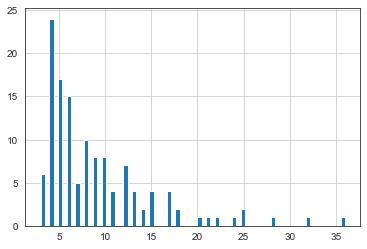

In [46]:
ratings['num of ratings'].hist(bins = 70)

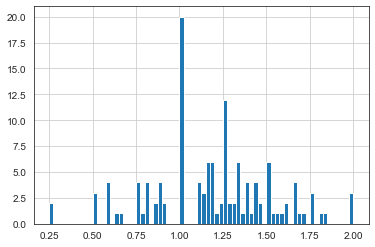

In [47]:
ratings['rating'].hist(bins=70)

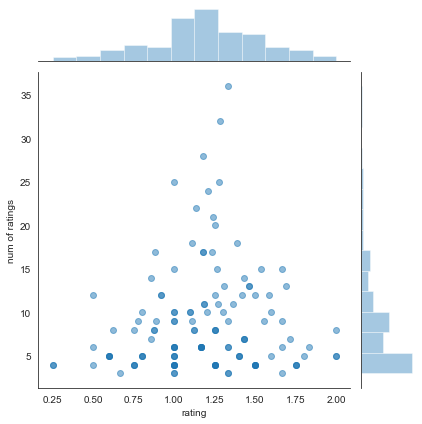

In [48]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [49]:
restaurantmat = df.pivot_table(index='userID',columns='name',values='rating')

In [50]:
restaurantmat.head()

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El Rincón de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1003,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1004,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
U1005,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
name,,
Tortas Locas Hipocampo,1.333333,36
puesto de tacos,1.281250,32
Cafeteria y Restaurant El Pacifico,1.178571,28
La Cantina Restaurante,1.280000,25
Gorditas Doa Gloria,1.000000,25
Restaurant la Chalita,1.208333,24
Restaurante Marisco Sam,1.136364,22
Restaurante El Cielo Potosino,1.238095,21
Restaurant Oriental Express,1.250000,20


In [52]:
Tortaslocas_user_ratings = restaurantmat['Tortas Locas Hipocampo']
Gorditasdoa_user_ratings = restaurantmat['Gorditas Doa Gloria']
Tortaslocas_user_ratings.head()

userID
U1001    0.0
U1002    1.0
U1003    NaN
U1004    NaN
U1005    NaN
Name: Tortas Locas Hipocampo, dtype: float64

In [61]:
import warnings
warnings.filterwarnings("ignore")
similar_to_Tortaslocas = restaurantmat.corrwith(Tortaslocas_user_ratings)
similar_to_Gorditasdoa = restaurantmat.corrwith(Gorditasdoa_user_ratings)

In [62]:
corr_Tortaslocas = pd.DataFrame(similar_to_Tortaslocas,columns=['Correlation'])
corr_Tortaslocas.dropna(inplace=True)
corr_Tortaslocas.head()

,Correlation
name,
Cabana Huasteca,0.930261
Cafe Chaires,-0.428571
Cafeteria y Restaurant El Pacifico,0.342475
Carls Jr,0.500000
El Herradero Restaurante and Bar,-0.500000


In [63]:
corr_Tortaslocas.sort_values('Correlation',ascending=False).head(10)

,Correlation
name,
rockabilly,1.000000
el pueblito,1.000000
cafe punta del cielo,1.000000
Tortas Locas Hipocampo,1.000000
Restaurante Pueblo Bonito,1.000000
Restaurante Guerra,1.000000
La Fontana Pizza Restaurante and Cafe,1.000000
Cabana Huasteca,0.930261
Restaurante la Gran Via,0.912871


In [64]:
corr_Tortaslocas = corr_Tortaslocas.join(ratings['num of ratings'])
corr_Tortaslocas.head()

,Correlation,num of ratings
name,,
Cabana Huasteca,0.930261,13
Cafe Chaires,-0.428571,15
Cafeteria y Restaurant El Pacifico,0.342475,28
Carls Jr,0.500000,7
El Herradero Restaurante and Bar,-0.500000,15


In [65]:
corr_Tortaslocas[corr_Tortaslocas['num of ratings']>10].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
name,,
Tortas Locas Hipocampo,1.000000,36
Restaurante Pueblo Bonito,1.000000,13
Restaurante Guerra,1.000000,12
Cabana Huasteca,0.930261,13
Restaurante la Gran Via,0.912871,13
Restaurante El Cielo Potosino,0.898933,21
La Virreina,0.892218,15
Restaurant Oriental Express,0.881409,20
Restaurante El Reyecito,0.867722,11


In [66]:
corr_Gorditasdoa = pd.DataFrame(similar_to_Gorditasdoa,columns=['Correlation'])
corr_Gorditasdoa.dropna(inplace=True)
corr_Gorditasdoa = corr_Gorditasdoa.join(ratings['num of ratings'])
corr_Gorditasdoa[corr_Gorditasdoa['num of ratings']>10].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
name,,
Gorditas Doa Gloria,1.000000,25
Rincon Huasteco,1.000000,12
Restaurante El Cielo Potosino,0.933257,21
Gordas de morales,0.866025,12
La Posada del Virrey,0.848838,18
La Virreina,0.845154,15
Tortas Locas Hipocampo,0.814823,36
Cabana Huasteca,0.724207,13
Pizzeria Julios,0.707107,12
